# Plot MPC-CBF: Static Obstacle

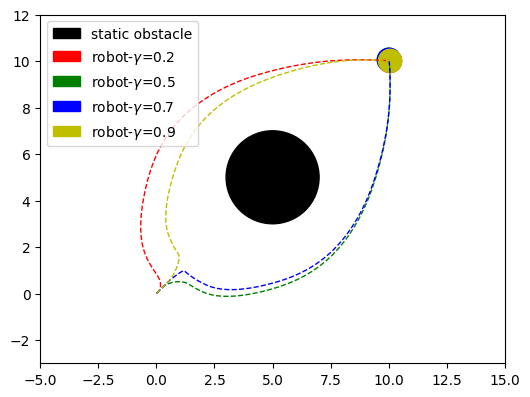

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import pickle

with open('./data/mpc_cbf_static_N_10_gamma_0.2.pkl', 'rb') as file:
    mpc_cbf_static_N_10_gamma_02 = pickle.load(file)
with open('./data/mpc_cbf_static_N_10_gamma_0.5.pkl', 'rb') as file:
    mpc_cbf_static_N_10_gamma_05 = pickle.load(file)
with open('./data/mpc_cbf_static_N_10_gamma_0.7.pkl', 'rb') as file:
    mpc_cbf_static_N_10_gamma_07 = pickle.load(file)
with open('./data/mpc_cbf_static_N_10_gamma_0.9.pkl', 'rb') as file:
    mpc_cbf_static_N_10_gamma_09 = pickle.load(file)


# Set up the figure, axis, and plot element
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-5, 15)
ax.set_ylim(-3, 12)
ax.set_aspect('equal')

# Create a static circle with radius 2 centered at (5, 5)
static_circle = patches.Circle((5, 5), 2, edgecolor='k', facecolor='k', label='static obstacle')
ax.add_patch(static_circle)

# Create robot with radius 0.5
robot_02 = patches.Circle((0, 0), 0.5, edgecolor='r', facecolor='r', label=r'robot-$\gamma$=0.2')
robot_05 = patches.Circle((0, 0), 0.5, edgecolor='g', facecolor='g', label=r'robot-$\gamma$=0.5')
robot_07 = patches.Circle((0, 0), 0.5, edgecolor='b', facecolor='b', label=r'robot-$\gamma$=0.7')
robot_09 = patches.Circle((0, 0), 0.5, edgecolor='y', facecolor='y', label=r'robot-$\gamma$=0.9')
ax.add_patch(robot_02)
ax.add_patch(robot_05)
ax.add_patch(robot_07)
ax.add_patch(robot_09)
# Create trace object for path visulization
trace_02, = ax.plot([], [], 'r--', lw=1)
trace_05, = ax.plot([], [], 'g--', lw=1)
trace_07, = ax.plot([], [], 'b--', lw=1)
trace_09, = ax.plot([], [], 'y--', lw=1)

# Initialize the circle's position
def init():
    trace_02.set_data([], [])
    trace_05.set_data([], [])
    trace_07.set_data([], [])
    trace_09.set_data([], [])
    robot_02.set_center((0, 0))
    robot_05.set_center((0, 0))
    robot_07.set_center((0, 0))
    robot_09.set_center((0, 0))
    return trace_02, trace_05, trace_07, trace_09, robot_02, robot_05, robot_07, robot_09

# Update the circle's position for each frame
def update(frame):

    # render robot trajectory for gama = 0.2
    if frame <= len(mpc_cbf_static_N_10_gamma_02['x']) - 1:
        robot_x_path = mpc_cbf_static_N_10_gamma_02['x']; robot_y_path = mpc_cbf_static_N_10_gamma_02['y']
        robot_02.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_02.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_N_10_gamma_02['x']; robot_y_path = mpc_cbf_static_N_10_gamma_02['y']
        robot_02.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_02.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.5
    if frame <= len(mpc_cbf_static_N_10_gamma_05['x']) - 1:
        robot_x_path = mpc_cbf_static_N_10_gamma_05['x']; robot_y_path = mpc_cbf_static_N_10_gamma_05['y']
        robot_05.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_05.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_N_10_gamma_05['x']; robot_y_path = mpc_cbf_static_N_10_gamma_05['y']
        robot_05.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_05.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.7
    if frame <= len(mpc_cbf_static_N_10_gamma_07['x']) - 1:
        robot_x_path = mpc_cbf_static_N_10_gamma_07['x']; robot_y_path = mpc_cbf_static_N_10_gamma_07['y']
        robot_07.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_07.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_N_10_gamma_07['x']; robot_y_path = mpc_cbf_static_N_10_gamma_07['y']
        robot_07.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_07.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.9
    if frame <= len(mpc_cbf_static_N_10_gamma_09['x']) - 1:
        robot_x_path = mpc_cbf_static_N_10_gamma_09['x']; robot_y_path = mpc_cbf_static_N_10_gamma_09['y']
        robot_09.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_09.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_N_10_gamma_09['x']; robot_y_path = mpc_cbf_static_N_10_gamma_09['y']
        robot_09.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_09.set_data(robot_x_path, robot_y_path)   
    
    return robot_02, robot_05, robot_07, robot_09
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=150, init_func=init, blit=True, repeat=True)
ax.legend(loc='upper left')
# Save the animation to a GIF file
ani.save('./figs/animation_mpc_cbf_static.gif', writer='pillow', fps=10)

# Display the animation
# plt.savefig('./figs/mpc_cbf_static.png')
plt.show()

# Plot MPC-DC: Static Obstacle

imported all data
created static circle
added circle
creating animation


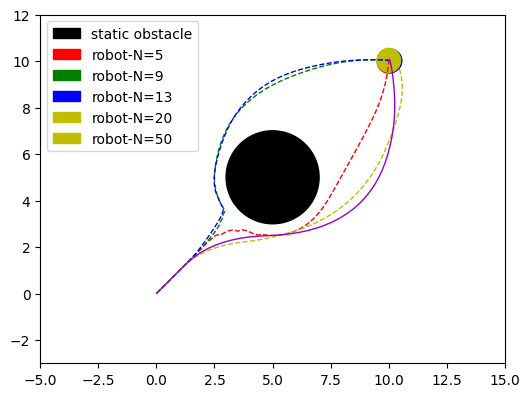

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import pickle

with open('./data/mpc_dc_static_N_5.pkl', 'rb') as file:
    mpc_dc_static_N_5 = pickle.load(file)
with open('./data/mpc_dc_static_N_9.pkl', 'rb') as file:
    mpc_dc_static_N_09 = pickle.load(file)
with open('./data/mpc_dc_static_N_13.pkl', 'rb') as file:
    mpc_dc_static_N_13 = pickle.load(file)
with open('./data/mpc_dc_static_N_20.pkl', 'rb') as file:
    mpc_dc_static_N_20 = pickle.load(file)
with open('./data/mpc_dc_static_N_15.pkl', 'rb') as file:
    mpc_dc_static_N_50 = pickle.load(file)

print("imported all data")

# Set up the figure, axis, and plot element
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-5, 15)
ax.set_ylim(-3, 12)
ax.set_aspect('equal')

# Create a static circle with radius 2 centered at (5, 5)
static_circle = patches.Circle((5, 5), 2, edgecolor='k', facecolor='k', label='static obstacle')
ax.add_patch(static_circle)

print("created static circle")

# Create robot with radius 0.5
robot_N_05 = patches.Circle((0, 0), 0.5, edgecolor='r', facecolor='r', label=r'robot-N=5')
robot_N_09 = patches.Circle((0, 0), 0.5, edgecolor='g', facecolor='g', label=r'robot-N=9')
robot_N_13 = patches.Circle((0, 0), 0.5, edgecolor='b', facecolor='b', label=r'robot-N=13')
robot_N_20 = patches.Circle((0, 0), 0.5, edgecolor='y', facecolor='y', label=r'robot-N=20')
robot_N_50 = patches.Circle((0, 0), 0.5, edgecolor='y', facecolor='y', label=r'robot-N=50')

ax.add_patch(robot_N_05)
ax.add_patch(robot_N_09)
ax.add_patch(robot_N_13)
ax.add_patch(robot_N_20)
ax.add_patch(robot_N_50)

print("added circle")

# Create trace object for path visulization
trace_N_05, = ax.plot([], [], 'r--', lw=1)
trace_N_09, = ax.plot([], [], 'g--', lw=1)
trace_N_13, = ax.plot([], [], 'b--', lw=1)
trace_N_20, = ax.plot([], [], 'y--', lw=1)
trace_N_50, = ax.plot([], [], color='darkviolet', lw=1)  # Gold

# Initialize the circle's position
def init():
    trace_N_05.set_data([], [])
    trace_N_09.set_data([], [])
    trace_N_13.set_data([], [])
    trace_N_20.set_data([], [])
    trace_N_50.set_data([], [])
    robot_N_05.set_center((0, 0))
    robot_N_09.set_center((0, 0))
    robot_N_13.set_center((0, 0))
    robot_N_20.set_center((0, 0))
    robot_N_50.set_center((0, 0))
    return trace_N_05, trace_N_09, trace_N_13, trace_N_20, trace_N_50, robot_N_05, robot_N_09, robot_N_13, robot_N_20, robot_N_50

# Update the circle's position for each frame
def update(frame):

    # render robot trajectory for N = 5
    if frame <= len(mpc_dc_static_N_5['x']) - 1:
        robot_x_path = mpc_dc_static_N_5['x']; robot_y_path = mpc_dc_static_N_5['y']
        robot_N_05.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_05.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_N_5['x']; robot_y_path = mpc_dc_static_N_5['y']
        robot_N_05.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_05.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 9
    if frame <= len(mpc_dc_static_N_09['x']) - 1:
        robot_x_path = mpc_dc_static_N_09['x']; robot_y_path = mpc_dc_static_N_09['y']
        robot_N_09.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_09.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_N_09['x']; robot_y_path = mpc_dc_static_N_09['y']
        robot_N_09.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_09.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 13
    if frame <= len(mpc_dc_static_N_13['x']) - 1:
        robot_x_path = mpc_dc_static_N_13['x']; robot_y_path = mpc_dc_static_N_13['y']
        robot_N_13.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_13.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_N_13['x']; robot_y_path = mpc_dc_static_N_13['y']
        robot_N_13.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_13.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 20
    if frame <= len(mpc_dc_static_N_20['x']) - 1:
        robot_x_path = mpc_dc_static_N_20['x']; robot_y_path = mpc_dc_static_N_20['y']
        robot_N_20.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_20.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_N_20['x']; robot_y_path = mpc_dc_static_N_20['y']
        robot_N_20.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_20.set_data(robot_x_path, robot_y_path)   
    
    # render robot trajectory for N = 50
    if frame <= len(mpc_dc_static_N_50['x']) - 1:
        robot_x_path = mpc_dc_static_N_50['x']; robot_y_path = mpc_dc_static_N_50['y']
        robot_N_50.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_50.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_N_50['x']; robot_y_path = mpc_dc_static_N_50['y']
        robot_N_50.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_50.set_data(robot_x_path, robot_y_path)  

    return robot_N_05, robot_N_09, robot_N_13, robot_N_20, robot_N_50

print("creating animation")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=150, init_func=init, blit=True, repeat=True)
ax.legend(loc='upper left')
# Save the animation to a GIF file
ani.save('./figs/animation_mpc_dc_static.gif', writer='pillow', fps=10)

# Display the animation
plt.savefig('./figs/mpc_dc_static.png')
plt.show()

# Plot MPC-CBF: Static & Dynamic Obstacle

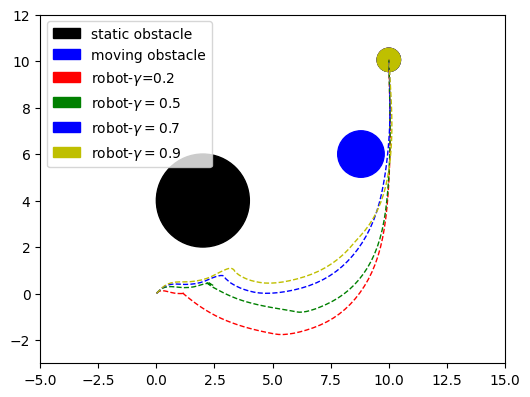

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import pickle

with open('./data/mpc_cbf_static_and_dynamic_N_10_gamma_0.2.pkl', 'rb') as file:
    mpc_cbf_static_and_dynamic_N_10_gamma_02 = pickle.load(file)
with open('./data/mpc_cbf_static_and_dynamic_N_10_gamma_0.5.pkl', 'rb') as file:
    mpc_cbf_static_and_dynamic_N_10_gamma_05 = pickle.load(file)
with open('./data/mpc_cbf_static_and_dynamic_N_10_gamma_0.7.pkl', 'rb') as file:
    mpc_cbf_static_and_dynamic_N_10_gamma_07 = pickle.load(file)
with open('./data/mpc_cbf_static_and_dynamic_N_10_gamma_0.9.pkl', 'rb') as file:
    mpc_cbf_static_and_dynamic_N_10_gamma_09 = pickle.load(file)

# Set up the figure, axis, and plot element
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-5, 15)
ax.set_ylim(-3, 12)
ax.set_aspect('equal')

# Create a static circle with radius 2 centered at (2, 4)
static_circle = patches.Circle((2, 4), 2, edgecolor='k', facecolor='k', label='static obstacle')
ax.add_patch(static_circle)

# Create a moving circle with radius 1
moving_circle = patches.Circle((7, 6), 1, edgecolor='b', facecolor='b', label='moving obstacle')
ax.add_patch(moving_circle)

# Create robot with radius 0.5
robot_02 = patches.Circle((0, 0), 0.5, edgecolor='r', facecolor='r', label=r'robot-$\gamma$=0.2')
robot_05 = patches.Circle((0, 0), 0.5, edgecolor='g', facecolor='g', label=r'robot-$\gamma=$0.5')
robot_07 = patches.Circle((0, 0), 0.5, edgecolor='b', facecolor='b', label=r'robot-$\gamma=$0.7')
robot_09 = patches.Circle((0, 0), 0.5, edgecolor='y', facecolor='y', label=r'robot-$\gamma=$0.9')
ax.add_patch(robot_02)
ax.add_patch(robot_05)
ax.add_patch(robot_07)
ax.add_patch(robot_09)

# Create trace object for path visulization
trace_02, = ax.plot([], [], 'r--', lw=1)
trace_05, = ax.plot([], [], 'g--', lw=1)
trace_07, = ax.plot([], [], 'b--', lw=1)
trace_09, = ax.plot([], [], 'y--', lw=1)


# Initialize the circle's position
def init():
    trace_02.set_data([], [])
    trace_05.set_data([], [])
    trace_07.set_data([], [])
    trace_09.set_data([], [])
    robot_02.set_center((0, 0))
    robot_05.set_center((0, 0))
    robot_07.set_center((0, 0))
    robot_09.set_center((0, 0))
    return trace_02, trace_05, trace_07, trace_09, robot_02, robot_05, robot_07, robot_09

# Update the circle's position for each frame
def update(frame):

    cycle_duration = 20
    position_in_cycle = frame % cycle_duration
    half_cycle_duration = cycle_duration / 2
    if position_in_cycle < cycle_duration / 2:
        # Moving from (7,6) to (9,6)
        x = 7 + (2 * position_in_cycle) / half_cycle_duration
    else:
        # Moving from (9,6) to (7,6)
        x = 9 - (2 * (position_in_cycle - half_cycle_duration)) / half_cycle_duration
    
    # Update the circle's center
    # render robot trajectory for gama = 0.2
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_cbf_static_and_dynamic_N_10_gamma_02['x']) - 1:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_02['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_02['y']
        robot_02.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_02.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_02['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_02['y']
        robot_02.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_02.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.5
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_cbf_static_and_dynamic_N_10_gamma_05['x']) - 1:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_05['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_05['y']
        robot_05.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_05.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_05['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_05['y']
        robot_05.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_05.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.7
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_cbf_static_and_dynamic_N_10_gamma_07['x']) - 1:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_07['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_07['y']
        robot_07.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_07.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_07['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_07['y']
        robot_07.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_07.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for gama = 0.9
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_cbf_static_and_dynamic_N_10_gamma_09['x']) - 1:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_09['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_09['y']
        robot_09.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_09.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_cbf_static_and_dynamic_N_10_gamma_09['x']; robot_y_path = mpc_cbf_static_and_dynamic_N_10_gamma_09['y']
        robot_09.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_09.set_data(robot_x_path, robot_y_path)

    
    return moving_circle, robot_02, robot_05, robot_07, robot_09

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=150, init_func=init, blit=True, repeat=True)
ax.legend(loc='upper left')
# Save the animation to a GIF file
ani.save('./figs/animation_mpc_cbf_static_and_dynamic.gif', writer='pillow', fps=10)

# Display the animation
# plt.savefig('./figs/mpc_cbf_static_and_dynamic.png')
plt.show()

# Plot MPC-DC: Static & Dynamic Obstacle

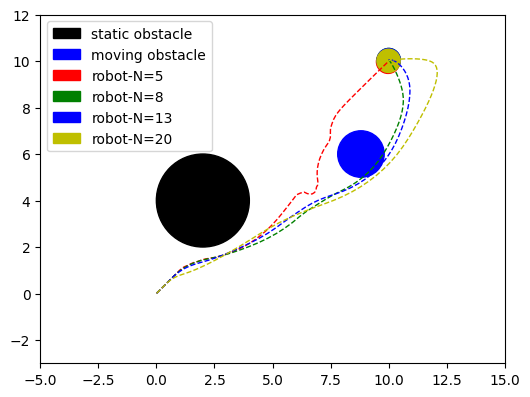

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import pickle

with open('./data/mpc_dc_static_and_dynamic_N_5.pkl', 'rb') as file:
    mpc_dc_static_and_dynamic_N_5 = pickle.load(file)
with open('./data/mpc_dc_static_and_dynamic_N_8.pkl', 'rb') as file:
    mpc_dc_static_and_dynamic_N_8 = pickle.load(file)
with open('./data/mpc_dc_static_and_dynamic_N_13.pkl', 'rb') as file:
    mpc_dc_static_and_dynamic_N_13 = pickle.load(file)
with open('./data/mpc_dc_static_and_dynamic_N_20.pkl', 'rb') as file:
    mpc_dc_static_and_dynamic_N_20 = pickle.load(file)

# Set up the figure, axis, and plot element
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-5, 15)
ax.set_ylim(-3, 12)
ax.set_aspect('equal')

# Create a static circle with radius 2 centered at (2, 4)
static_circle = patches.Circle((2, 4), 2, edgecolor='k', facecolor='k', label='static obstacle')
ax.add_patch(static_circle)

# Create a moving circle with radius 1
moving_circle = patches.Circle((7, 6), 1, edgecolor='b', facecolor='b', label='moving obstacle')
ax.add_patch(moving_circle)

# Create robot with radius 0.5
robot_N_05 = patches.Circle((0, 0), 0.5, edgecolor='r', facecolor='r', label='robot-N=5')
robot_N_08 = patches.Circle((0, 0), 0.5, edgecolor='g', facecolor='g', label='robot-N=8')
robot_N_13 = patches.Circle((0, 0), 0.5, edgecolor='b', facecolor='b', label='robot-N=13')
robot_N_20 = patches.Circle((0, 0), 0.5, edgecolor='y', facecolor='y', label='robot-N=20')
ax.add_patch(robot_N_05)
ax.add_patch(robot_N_08)
ax.add_patch(robot_N_13)
ax.add_patch(robot_N_20)

# Create trace object for path visulization
trace_N_05, = ax.plot([], [], 'r--', lw=1)
trace_N_08, = ax.plot([], [], 'g--', lw=1)
trace_N_13, = ax.plot([], [], 'b--', lw=1)
trace_N_20, = ax.plot([], [], 'y--', lw=1)


# Initialize the circle's position
def init():
    trace_N_05.set_data([], [])
    trace_N_08.set_data([], [])
    trace_N_13.set_data([], [])
    trace_N_20.set_data([], [])
    robot_N_05.set_center((0, 0))
    robot_N_08.set_center((0, 0))
    robot_N_13.set_center((0, 0))
    robot_N_20.set_center((0, 0))
    return trace_N_05, trace_N_08, trace_N_13, trace_N_20, robot_N_05, robot_N_08, robot_N_13, robot_N_20

# Update the circle's position for each frame
def update(frame):

    cycle_duration = 20
    position_in_cycle = frame % cycle_duration
    half_cycle_duration = cycle_duration / 2
    if position_in_cycle < cycle_duration / 2:
        # Moving from (7,6) to (9,6)
        x = 7 + (2 * position_in_cycle) / half_cycle_duration
    else:
        # Moving from (9,6) to (7,6)
        x = 9 - (2 * (position_in_cycle - half_cycle_duration)) / half_cycle_duration
    
    # Update the circle's center
    # render robot trajectory for N = 5
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_dc_static_and_dynamic_N_5['x']) - 1:
        robot_x_path = mpc_dc_static_and_dynamic_N_5['x']; robot_y_path = mpc_dc_static_and_dynamic_N_5['y']
        robot_N_05.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_05.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_and_dynamic_N_5['x']; robot_y_path = mpc_dc_static_and_dynamic_N_5['y']
        robot_N_05.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_05.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 8
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_dc_static_and_dynamic_N_8['x']) - 1:
        robot_x_path = mpc_dc_static_and_dynamic_N_8['x']; robot_y_path = mpc_dc_static_and_dynamic_N_8['y']
        robot_N_08.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_08.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_and_dynamic_N_8['x']; robot_y_path = mpc_dc_static_and_dynamic_N_8['y']
        robot_N_08.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_08.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 13
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_dc_static_and_dynamic_N_13['x']) - 1:
        robot_x_path = mpc_dc_static_and_dynamic_N_13['x']; robot_y_path = mpc_dc_static_and_dynamic_N_13['y']
        robot_N_13.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_13.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_and_dynamic_N_13['x']; robot_y_path = mpc_dc_static_and_dynamic_N_13['y']
        robot_N_13.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_13.set_data(robot_x_path, robot_y_path)
    
    # render robot trajectory for N = 20
    moving_circle.set_center((x, 6))
    if frame <= len(mpc_dc_static_and_dynamic_N_20['x']) - 1:
        robot_x_path = mpc_dc_static_and_dynamic_N_20['x']; robot_y_path = mpc_dc_static_and_dynamic_N_20['y']
        robot_N_20.set_center((robot_x_path[frame], robot_y_path[frame]))
        trace_N_20.set_data(robot_x_path[:frame], robot_y_path[:frame])
    else:
        robot_x_path = mpc_dc_static_and_dynamic_N_20['x']; robot_y_path = mpc_dc_static_and_dynamic_N_20['y']
        robot_N_20.set_center((robot_x_path[-1],robot_y_path[-1]))
        trace_N_20.set_data(robot_x_path, robot_y_path)

    
    return moving_circle, robot_N_05, robot_N_08, robot_N_13, robot_N_20

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=150, init_func=init, blit=True, repeat=True)
ax.legend(loc='upper left')
# Save the animation to a GIF file
ani.save('./figs/animation_mpc_dc_static_and_dynamic.gif', writer='pillow', fps=10)


# Display the animation
# plt.savefig('./figs/mpc_dc_static_and_dynamic.png')
plt.show()